![gym](gym.png)


In this Data Camp project, I imagine being a product manager for a fitness studio interested in understanding the current demand for digital fitness classes. I plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

I used a provided dataset with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

The project asks when was the global search for 'workout' at its peak? Save the year of peak interest as a string named year_str in the format "yyyy".

In [2]:
# I first read in workout.csv to dataframe
workout_df = pd.read_csv('./data/workout.csv')
workout_df.head(5)

,month,workout_worldwide
0,2018-03,59
1,2018-04,61
2,2018-05,57
3,2018-06,56
4,2018-07,51


In [3]:
# I found the max score for keyword 'workout', then found what the value of the 'month' field was for that row.  Then saved the year part of the date as year_str.
wkout_max = max(workout_df['workout_worldwide'])
month_of_max = workout_df[workout_df['workout_worldwide'] == wkout_max]['month'].values[0]
year_str = month_of_max[:4]
print(year_str)

2020


The project asks, of the keywords available, what was the most popular during the covid pandemic, and what is the most popular now? Save your answers as variables called peak_covid and current respectively.

In [4]:
# To answer question 2, I turn three_keywords.csv into a dataframe
three_kw_df = pd.read_csv('./data/three_keywords.csv')
three_kw_df.head(5)

,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
0,2018-03,12,16,10
1,2018-04,12,18,10
2,2018-05,13,16,9
3,2018-06,12,17,9
4,2018-07,12,17,9


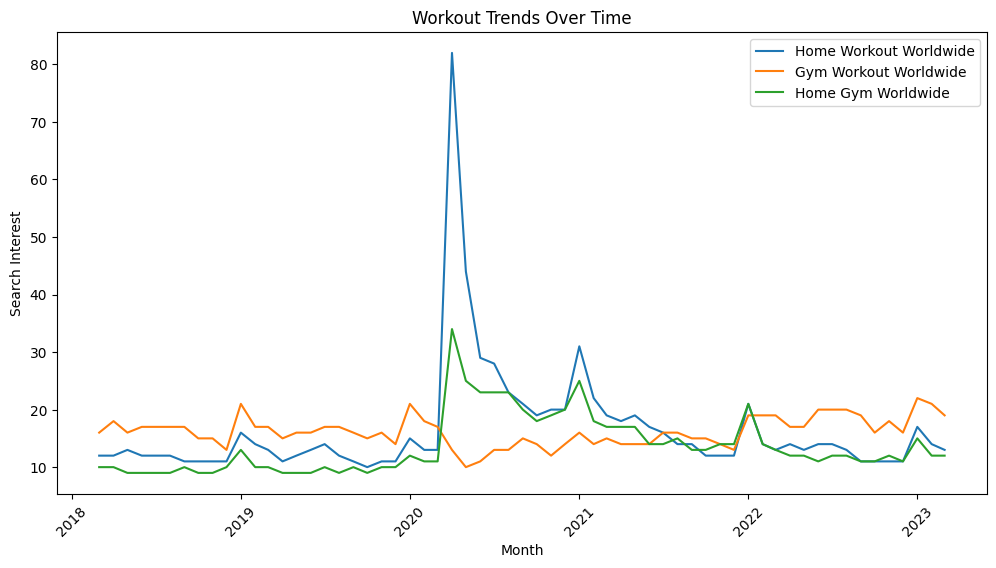

In [5]:
# Convert 'month' column to datetime format for better plotting
three_kw_df['month'] = pd.to_datetime(three_kw_df['month'])

# Plotting the data from three columns with 'month' on the x-axis
plt.figure(figsize=(12, 6))

# Plot each series
plt.plot(three_kw_df['month'], three_kw_df['home_workout_worldwide'], label='Home Workout Worldwide')
plt.plot(three_kw_df['month'], three_kw_df['gym_workout_worldwide'], label='Gym Workout Worldwide')
plt.plot(three_kw_df['month'], three_kw_df['home_gym_worldwide'], label='Home Gym Worldwide')

# Adding title and labels
plt.title('Workout Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Search Interest')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [6]:
peak_covid = "Home Workout"
current = "Gym Workout"

Using the line chart above, it's easy to see that the peak keyword for most of the covid pandemic was "Home Workout Worldwide" while "Gym Workout Worldwide" is currently most popular (2023).

The project asks, what country has the highest interest for workouts among the following: United States, Australia, or Japan? Save your answer as top_country.

In [7]:
workout_geo_df = pd.read_csv("./data/workout_geo.csv")
workout_geo_df.head(5)

,country,workout_2018_2023
0,Guam,NaN
1,Falkland Islands (Islas Malvinas),NaN
2,Cook Islands,NaN
3,Brunei,NaN
4,Palau,NaN


In [8]:
# Filter the dataframe for the specified countries
filtered_countries = workout_geo_df[workout_geo_df['country'].isin(['United States', 'Australia', 'Japan'])]
print(filtered_countries)

# Find the country with the highest value in the workout_2018_2023 column
top_country = filtered_countries.loc[filtered_countries['workout_2018_2023'].idxmax(), 'country']

# Print the result
top_country

           country  workout_2018_2023
5    United States              100.0
18       Australia               77.0
216          Japan                1.0


'United States'

The project asks to expand the virtual home workouts offering to either the Philippines or Malaysia. Which of the two countries has the highest interest in home workouts? Identify the country and save it as home_workout_geo.

In [9]:
three_kw_geo_df = pd.read_csv("./data/three_keywords_geo.csv")
pd.set_option('display.max_columns', 4)  # Ensure all columns are displayed
filtered_countries2 = three_kw_geo_df[three_kw_geo_df['Country'].isin(['Philippines','Malaysia'])]
filtered_countries2

,Country,home_workout_2018_2023,gym_workout_2018_2023,home_gym_2018_2023
23,Philippines,52.0,38.0,10.0
61,Malaysia,47.0,38.0,15.0


In [10]:
home_workout_geo = "Philippines"
print(home_workout_geo)

Philippines
